In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [112]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [113]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


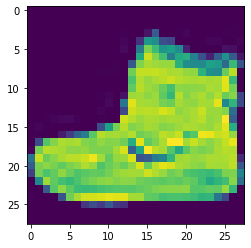

In [114]:
plt.imshow(train_images[0])

In [115]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [116]:
train_images = train_images/255
test_images = test_images/255

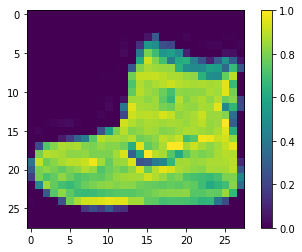

In [117]:
plt.imshow(train_images[0])
plt.colorbar()


In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Softmax, Flatten

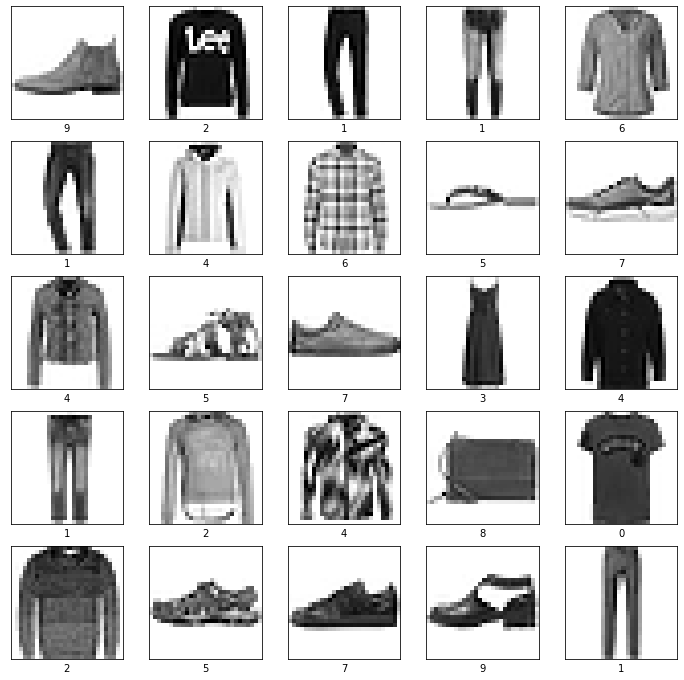

In [119]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])

In [120]:
test_images[0].shape

(28, 28)

In [121]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(units=20,activation='relu'),
    Dense(units=120,activation='relu'),
    Dense(units=10),
    Softmax()
])

In [122]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'], optimizer='adam')

In [123]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7240 - accuracy: 0.7476 - val_loss: 1.6797 - val_accuracy: 0.7835
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6462 - accuracy: 0.8178 - val_loss: 1.6248 - val_accuracy: 0.8388
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6209 - accuracy: 0.8416 - val_loss: 1.6187 - val_accuracy: 0.8425
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6130 - accuracy: 0.8485 - val_loss: 1.6166 - val_accuracy: 0.8459
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6068 - accuracy: 0.8556 - val_loss: 1.6086 - val_accuracy: 0.8523
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6033 - accuracy: 0.8583 - val_loss: 1.6176 - val_accuracy: 0.8442
Epoch 7/10
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6000 - accuracy: 0.8616 - val_loss: 1.6083 - val_accuracy:

In [124]:
history = model.history

In [125]:
df_hist = pd.DataFrame(history.history)

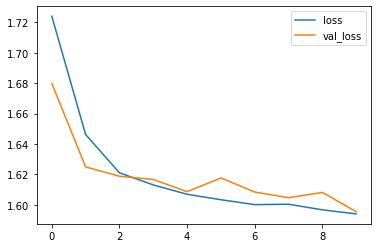

In [126]:
df_hist[['loss','val_loss']].plot()

In [127]:
preds = model.predict(test_images)

313/313 [==============================] - 0s 932us/step


In [128]:
np.argmax(preds[0])

9

In [129]:
test_labels[0]

9

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
preds_single = [np.argmax(pred) for pred in preds]


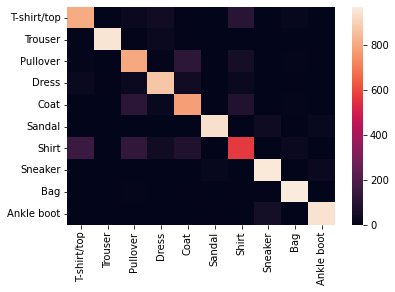

In [132]:
sns.heatmap(confusion_matrix(test_labels, preds_single), 
            xticklabels=class_names, yticklabels=class_names)

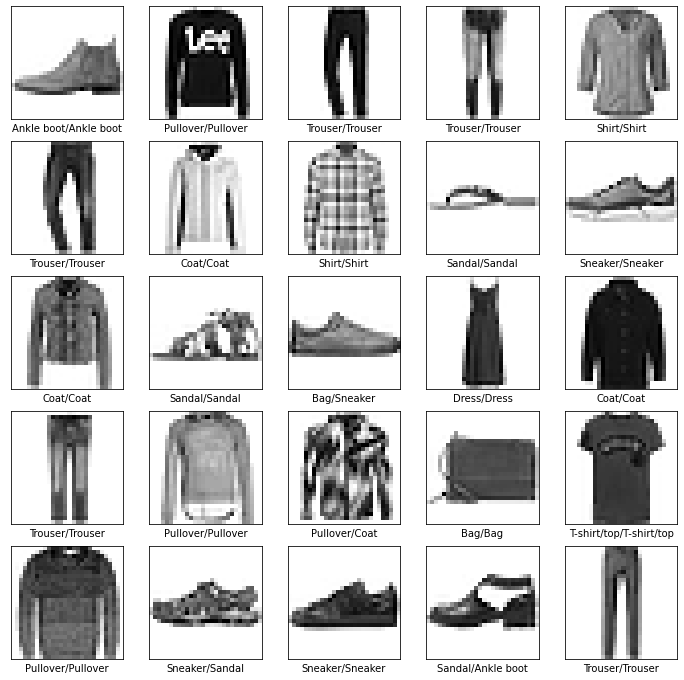

In [133]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(f'{class_names[preds_single[i]]}/{class_names[test_labels[i]]}')